In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.stats import bootstrap

In [2]:
def thermalization(L, window):
    rhos = pd.read_csv('therm/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    rho_bar = np.average(rhos, axis=0)
    late_avg = 0
    # late_avg = np.average(rho_bar[10:])
    plt.plot(rho_bar-late_avg)
    plt.xlim((0,window))
    plt.show()

def autocorrelation(L, thermalization_time, window):
    rhos = pd.read_csv('autoc/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    interval = np.shape(rhos)[1] - 1
    result = np.zeros(2*(interval-thermalization_time)+1)
    for rho in rhos:
        data = rho[thermalization_time:]
        x = data - np.mean(data)
        result += np.correlate(x, x, mode='full')
    plt.plot(result[interval-thermalization_time:]/len(rhos)/np.arange(1+interval-thermalization_time,0,-1))
    plt.xlim((0,window))
    plt.show()

4 by 4 system: thermalization time 10, autocorrelation time 20
4 by 4: 10000 runs, each of 100 steps


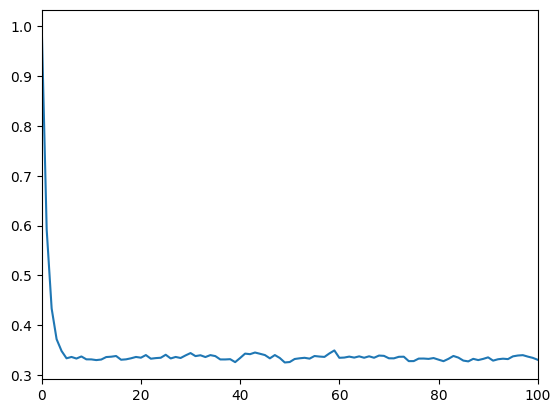

4 by 4: 100 runs, each of 1000 steps


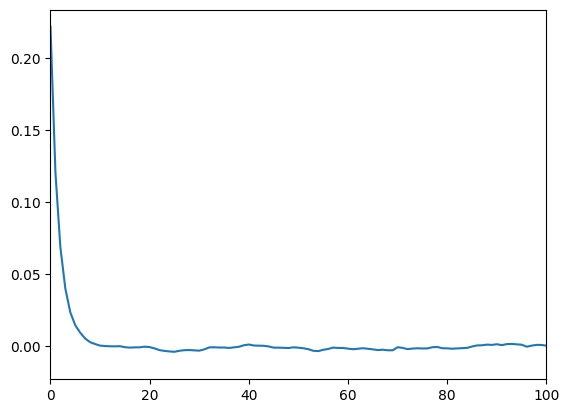

In [3]:
L = 4
print(str(L) + " by " + str(L) + " system: thermalization time 10, autocorrelation time 20")
thermalization(L, 100)
autocorrelation(L, 10, 100)

6 by 6 system: thermalization time 20, autocorrelation time 30
6 by 6: 10000 runs, each of 100 steps


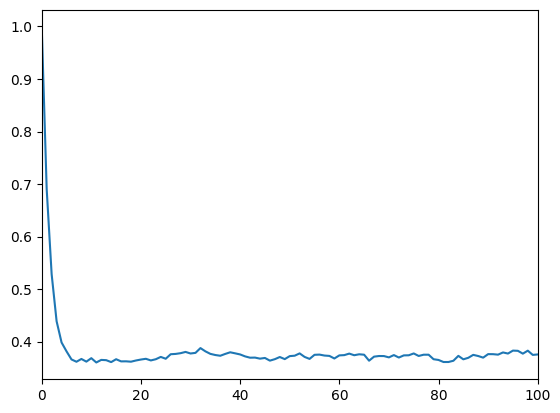

6 by 6: 100 runs, each of 1000 steps


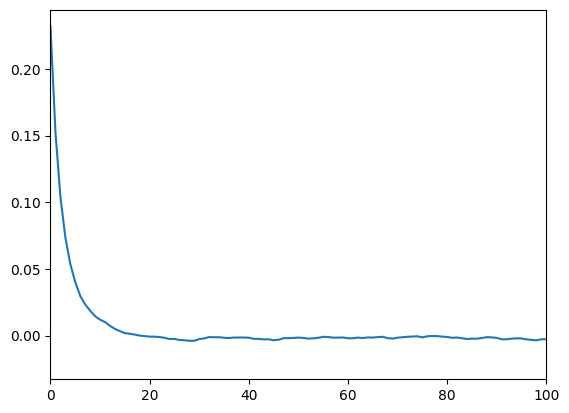

In [4]:
L = 6
print(str(L) + " by " + str(L) + " system: thermalization time 20, autocorrelation time 30")
thermalization(L, 100)
autocorrelation(L, 20, 100)

8 by 8 system: thermalization time 30, autocorrelation time 40
8 by 8: 10000 runs, each of 100 steps


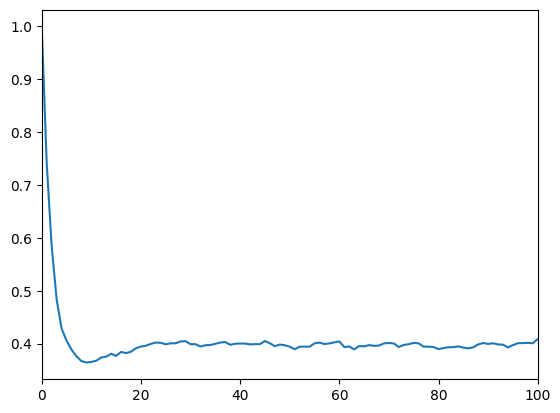

8 by 8: 100 runs, each of 1000 steps


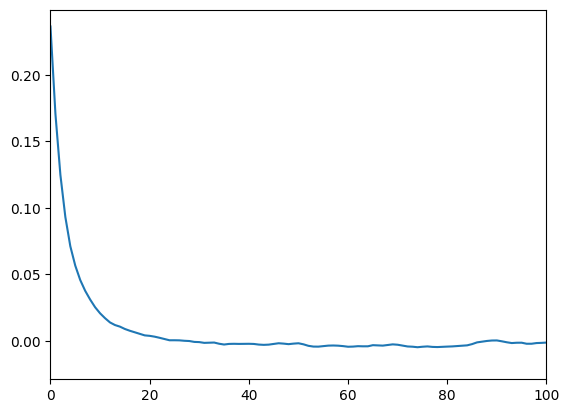

In [5]:
L = 8
print(str(L) + " by " + str(L) + " system: thermalization time 30, autocorrelation time 40")
thermalization(L, 100)
autocorrelation(L, 30, 100)

12 by 12 system: thermalization time 70, autocorrelation time 100
12 by 12: 10000 runs, each of 300 steps


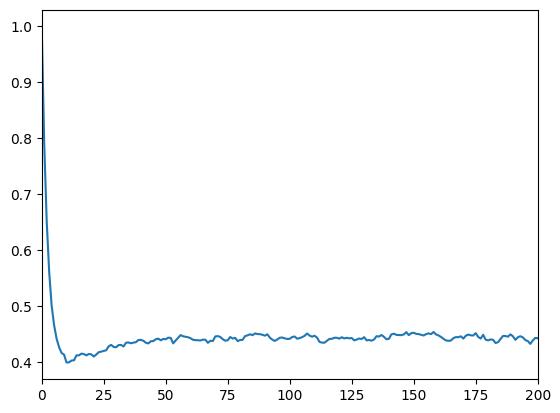

12 by 12: 100 runs, each of 1000 steps


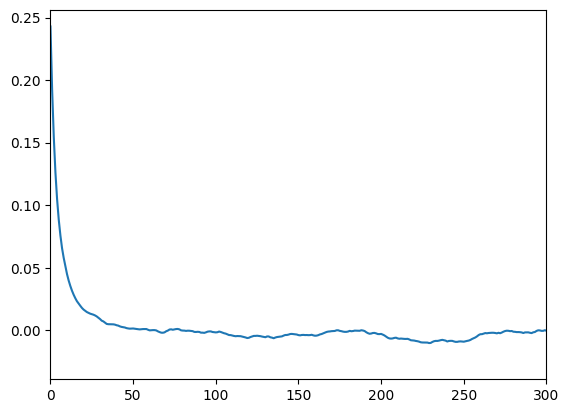

In [6]:
L = 12
print(str(L) + " by " + str(L) + " system: thermalization time 70, autocorrelation time 100")
thermalization(L, 200)
autocorrelation(L, 70, 300)

16 by 16 system: thermalization time 100, autocorrelation time 150
16 by 16: 10000 runs, each of 300 steps


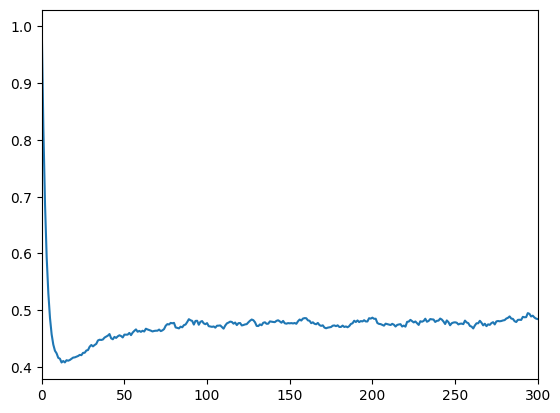

16 by 16: 100 runs, each of 1000 steps


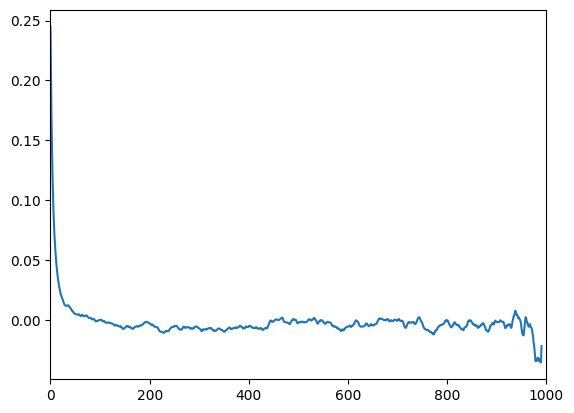

In [46]:
L = 16
print(str(L) + " by " + str(L) + " system: thermalization time 100, autocorrelation time 150")
thermalization(L, 300)
autocorrelation(L, 10, 1000)

20 by 20 system: thermalization time 200, autocorrelation time 200
20 by 20: 100000 runs, each of 400 steps


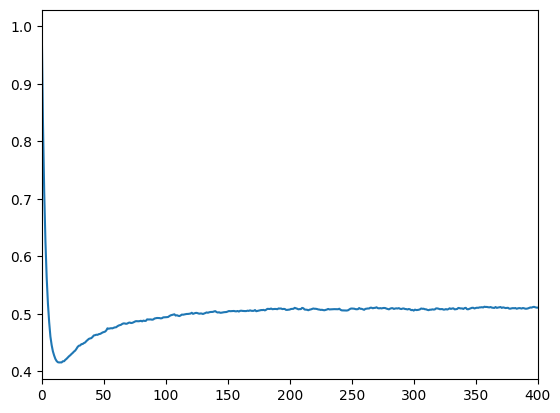

20 by 20: 100 runs, each of 2000 steps


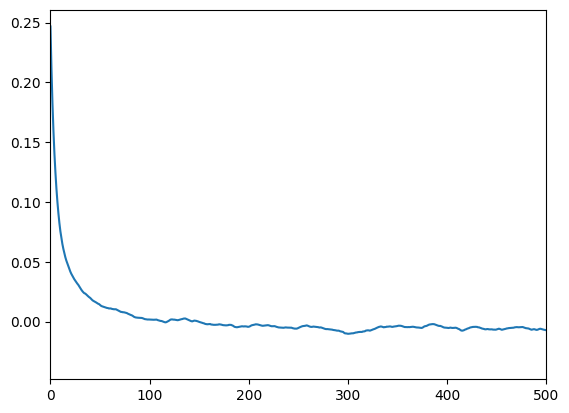

In [18]:
L = 20
print(str(L) + " by " + str(L) + " system: thermalization time 200, autocorrelation time 200")
thermalization(L, 400)
autocorrelation(L, 200, 500)

24 by 24 system: thermalization time 300, autocorrelation time 300
24 by 24: 100000 runs, each of 500 steps


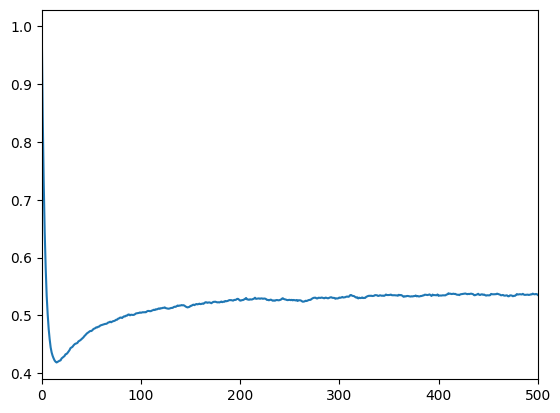

FileNotFoundError: [Errno 2] No such file or directory: 'autoc/is_trivial24by24.dat'

In [45]:
L = 24
print(str(L) + " by " + str(L) + " system: thermalization time 300, autocorrelation time 300")
thermalization(L, 500)
autocorrelation(L, 300, 1000)

In [68]:
sizes = (4,6,8,12,16,20,24)
my_data = []
my_errors = []
for L in sizes:
    rhos = pd.read_csv('data/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    my_data.append(np.average(rhos[:,1:]))
    my_errors.append(np.mean(bootstrap(rhos[:,1:], np.std).bootstrap_distribution))

4 by 4: 1 runs, each of 10000 steps
6 by 6: 1 runs, each of 20000 steps
8 by 8: 1 runs, each of 10000 steps
12 by 12: 1 runs, each of 5000 steps
16 by 16: 1 runs, each of 5000 steps
20 by 20: 1 runs, each of 10000 steps
24 by 24: 1 runs, each of 10000 steps


In [62]:
[ollie_sizes, ollie_data] = np.load("MC_data_bigflip.npy")

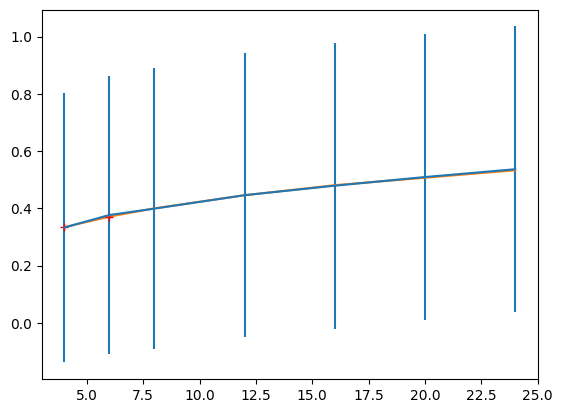

In [69]:
plt.errorbar(sizes, my_data, yerr=my_errors)
plt.plot(ollie_sizes[:6], ollie_data[:6])
plt.plot(4, 21759/65115, "r+")
plt.plot(6, 4201478043/11328279819, "r+")

In [ ]:
my_data

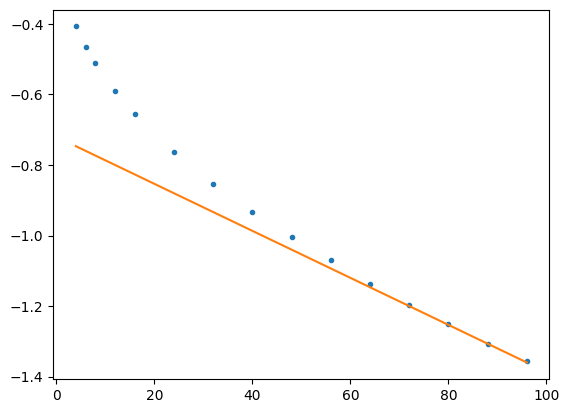

In [43]:
plt.plot(ollie_sizes, np.log(1-ollie_data), '.')
plt.plot(ollie_sizes, -0.72 - ollie_sizes/150)
plt.show()

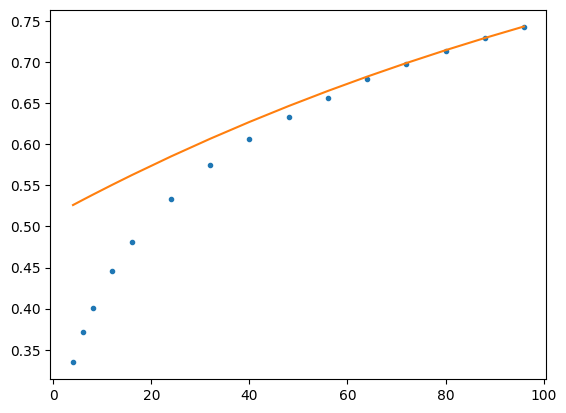

In [44]:
plt.plot(ollie_sizes, ollie_data, '.')
plt.plot(ollie_sizes, 1-np.exp(-0.72 - ollie_sizes/150))
plt.show()

In [ ]:
[ollie_sizes, ollie_data] = np.load("MC_data_bigflip.npy")